In [1]:
import pandas as pd
import hm
import re
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.preprocessing import sequence
from amseg. amharicNormalizer import AmharicNormalizer as normalizer 
from amseg. amharicSegmenter import AmharicSegmenter
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix


@@@@ This is HornMorpho, version 4.3 @@@@



In [2]:
trainData = pd.read_csv("dataset/train_data.csv",encoding="utf-8")
testData = pd.read_csv("dataset/test_data.csv",encoding="utf-8")
spch=open("stoplist/spchar.txt",'r',encoding="utf-8")
spch=spch.read()
spch = spch.split()
amstop=open("stoplist/amharic_stop_lists.txt",'r',encoding="utf-8")
stoplist=amstop.read()
amharicstop = stoplist.split()

In [3]:
#********************preprocesing train data*******************

In [4]:
sent_punct=[]
word_punct=[]
tokenizer = AmharicSegmenter(sent_punct,word_punct)
for index, sentence in enumerate(trainData["text"].values):
    word=tokenizer.amharic_tokenizer(sentence)
    tokens= ""
    for words in word:
        word2=str(words).replace("Token: ", "")
        tokens+=word2+" "
    trainData.loc[index,'text'] = tokens
trainData.head(3)

,text,label
0,አለፈ ተረፈ ያዘ አቋም ተነሳ አምላክ ቀጣ አሰበ ስጋት አደረ,0
1,መጠን ከፍ ድርግ ገነነ ዘርፍ እጥፍ አደገ ቻለ መሰለ,1
2,ሃይማኖት እምነት ተጣመረ ግደታም ጭምር ሃይማኖት እምነት ጠራ,0


In [5]:
sent_punct=[]
word_punct=[]
tokenizer = AmharicSegmenter(sent_punct,word_punct)
for index, sentence in enumerate(testData["text"].values):
    word=tokenizer.amharic_tokenizer(sentence)
    tokens= ""
    for words in word:
        word2=str(words).replace("Token: ", "")
        tokens+=word2+" "
    testData.loc[index,'text'] = tokens
testData.head(3)

,text,label
0,እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ,0
1,በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ,1
2,ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ,0


In [6]:
for indexs, cell_val in enumerate(trainData["text"].values):
    for i in spch:
        cell_val=cell_val.replace(i, "")
    trainData.loc[indexs,'text'] = cell_val
print("non spch")
trainData.head(5)

non spch


,text,label
0,አለፈ ተረፈ ያዘ አቋም ተነሳ አምላክ ቀጣ አሰበ ስጋት አደረ,0
1,መጠን ከፍ ድርግ ገነነ ዘርፍ እጥፍ አደገ ቻለ መሰለ,1
2,ሃይማኖት እምነት ተጣመረ ግደታም ጭምር ሃይማኖት እምነት ጠራ,0
3,አፍሪካ ደረጃ ያህል ያለው አባል አፈራ ፓርቲ ቀደመ ድርግ,0
4,ድሬዳዋ መንግስት መንግስታዊ ተቋም በአንድላይ ሰራ,0


In [7]:
for indexs, cell_val in enumerate(testData["text"].values):
    for i in spch:
        cell_val=cell_val.replace(i, "")
    testData.loc[indexs,'text'] = cell_val
print("non spch")
testData.head(5)

non spch


,text,label
0,እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ,0
1,በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ,1
2,ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ,0
3,በሽር አደነ መንግስት ገር ሸማቂወችን ደመሰሰ ተቻለ,1
4,ሃብታም ስም ጠቀሰ ከእነእንትና አመሸ መዘነ,0


In [8]:
for index, sentence in enumerate(trainData["text"].values):
    sentence=sentence.split()
    nonstop_stor=""
    for word in sentence:
        if word not in amharicstop:
            nonstop_stor+=word+" "
    if nonstop_stor!="":
        trainData.loc[index,'text'] = nonstop_stor
print("Non stop")
trainData.head(4)

Non stop


,text,label
0,አለፈ ተረፈ ያዘ አቋም ተነሳ አምላክ ቀጣ አሰበ ስጋት አደረ,0
1,መጠን ከፍ ድርግ ገነነ ዘርፍ እጥፍ አደገ ቻለ መሰለ,1
2,ሃይማኖት እምነት ተጣመረ ግደታም ጭምር ሃይማኖት እምነት ጠራ,0
3,አፍሪካ ደረጃ ያህል ያለው አባል አፈራ ፓርቲ ቀደመ ድርግ,0


In [9]:
for index, sentence in enumerate(testData["text"].values):
    sentence=sentence.split()
    nonstop_stor=""
    for word in sentence:
        if word not in amharicstop:
            nonstop_stor+=word+" "
    if nonstop_stor!="":
        testData.loc[index,'text'] = nonstop_stor
print("Non stop")
testData.head(4)

Non stop


,text,label
0,እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ,0
1,በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ,1
2,ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ,0
3,በሽር አደነ መንግስት ገር ሸማቂወችን ደመሰሰ ተቻለ,1


In [10]:
#trainData.to_excel('complex_word.xlsx',index=False,encoding="utf-8")

In [11]:
for index, sentence in enumerate(trainData["text"].values):
    normalized = normalizer.normalize(sentence) 
    trainData.loc[index,'text'] = normalized
print("Normalized")
trainData.head(3)

Normalized


,text,label
0,አለፈ ተረፈ ያዘ አቋም ተነሳ አምላክ ቀጣ አሰበ ስጋት አደረ,0
1,መጠን ከፍ ድርግ ገነነ ዘርፍ እጥፍ አደገ ቻለ መሰለ,1
2,ሃይማኖት እምነት ተጣመረ ግደታም ጭምር ሃይማኖት እምነት ጠራ,0


In [12]:
for index, sentence in enumerate(testData["text"].values):
    normalized = normalizer.normalize(sentence) 
    testData.loc[index,'text'] = normalized
print("Normalized")
testData.head(3)

Normalized


,text,label
0,እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ,0
1,በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ,1
2,ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ,0


In [88]:
#hybreade horn morphome for train data******************************

In [ ]:
# # convert to root
# for index, sent in enumerate(trainData["text"].values):
#     sent=sent.split()
#     result_sent=""
#     for word in sent:
#         root=hm.anal('amh', word, um=True)
#         if root!=[]:
#             roots=root[0]['lemma']
#             roots=roots.replace("|", "/")
#             if "/" in roots:
#                 result = re.search('(.*)/', roots)
#                 if result not in amharicstop and result not in spch:
#                     result_sent+=result.group(1)+" "
#             else:
#                 result_sent+=word+" "                        
#         else:
#             result_sent+=word+" "
#     print(result_sent)
#     trainData.loc[index,'text'] = result_sent   
# print("root train data")
# trainData

# #convert to root test data
# for index, sent in enumerate(testData["text"].values):
#     sent=sent.split()
#     result_sent=""
#     for word in sent:
#         root=hm.anal('amh', word, um=True)
#         if root!=[]:
#             roots=root[0]['lemma']
#             roots=roots.replace("|", "/")
#             if "/" in roots:
#                 result = re.search('(.*)/', roots)
#                 if result not in amharicstop and result not in spch:
#                     result_sent+=result.group(1)+" "
#             else:
#                 result_sent+=word+" "                        
#         else:
#             result_sent+=word+" "
#     testData.loc[index,'text'] = result_sent
# print("root test data")
# testData

Loading Amharic data from amh_lang
Loading FSTs for አማርኛ (analysis/generation) ...
አለፈ ተረፈ ያዘ አቋም ተነሳ አምላክ ቀጣ አሰበ ስጋት አደረ 
መጠን ከፍ ድርግ ገነነ ዘርፍ እጥፍ አደገ ቻለ መሰለ 
ሀይማኖት እምነት ተጣመረ ግደታም ጭምር ሀይማኖት እምነት ጠራ 
አፍሪካ ደረጃ ያህል ያለው አባል አፈራ ፓርቲ ቀደመ ድርግ 
ድሬዳዋ መንግስት መንግስታዊ ተቋም በአንድላይ ሰረረ 
አራዳ ልጅ ብር መታ ቢሊየን ብር ተጠጋ ገንዘብ 
ክልል ሉአላዊ ሀገር አስተዳደራዊ መዋቅር ራስ ቻለ ሀገር 
ምግብ ሸቀጥ አምና የካቲት ወር ተነጻጸረ መቶ በላይ ዋግ ናረ 
ነገ መሰለ ገጠመ ቻለ አሰበ ስጋት ተሸበረ ቀረ 
ድጋፍ ጠነከረ ቀጠለ ያለው አጋርነት ኖረ ጽሁፍ ቋጨ 
ሉቃስ ጴጥሮስ ደገመ ኢየሱስ አዘነ ድርግ 
አልማዝ ከረጢት አውሮፕላን ገብ በረራ ነሳ ሁለት ተመካ ከተፍ 
አካባቢ ራስ አለቃ ድርጎ ቈጠረ ኮሎኔል ደመላሽ ከፍተኛ ጥረት ድርግ 
ኢትዮጵያ ቡና እሴት ቡድን ገና ጅምር ጥር ተቀባይነት ሀላፊነት 
አሜሪካኖቹ አመት ጀመረ ስርአት ቀላል 
ብሄራዊ ቴአትር ፍቅር ኖረ አደገ ታዋቂነትን ተረፈ ለፋ ቤት 
ጸደቀ ወጣ ህግ ደንብ ግንዛቤ ጨበጠ ስራ ሰረረ ፈለገ 
ወታደር ታጠቀ አይነት ካርታ ጎራ ሰረረ ሲቸበቸብ ሰነበተ 
መንግስት ርቀት ጠበቀ አበረ ሰረረ ቻለ ሰረረ ሞከረ 
አርቲስት ፍቃዱ ተክለማርያም ኢትዮጵያ ሬድዮ ተረከ የብዙወችን ቀልብ ሳበ 
ሀገር በስታድየሞች ዙሪያ ገነባ ሱቅ ትጥቅ መሰል ቁሳቁስ ሸጠ 
ምክትል ፕሬዝዳንት ሳልቫዶር ኢትዮጵያ እድገት ጎዳ ገነነ ጠቀሰ አለፈ 
ይሁን ትእይንት ቀረጸ ተገኘ ካሜራ ባለሙያወች አንዱ ጠለፈ 
ሃብረተሰቡ ነገደ ግድብ ግንባታ ድርግ ተሳተፈ ቀጠለ 
መንግስት ገለጸ ይፋ ሰአት ጀመረ ተግባር ተከናወነ

In [16]:
# trainData.to_excel('dataset/root_train_dataset.xlsx',index=False,encoding="utf-8")
# testdata.to_excel('dataset/root_test_dataset.xlsx',index=False,encoding="utf-8")

In [15]:
#********************models*********************

C:\Users\bon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of complex and simple sentences')

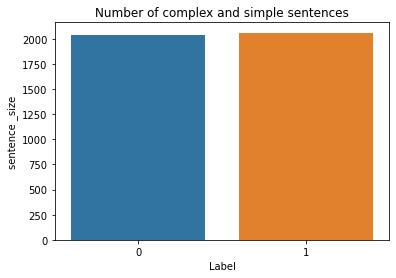

In [38]:
sns.countplot(trainData.label)
plt.xlabel('Label')
plt.ylabel('sentence _size')
plt.title('Number of complex and simple sentences')

In [77]:
# trainData=shuffle(trainData)
# trainData

In [3]:
x_train, y_train = trainData['text'].values, trainData['label'].values

x_test, y_test = testData['text'].values, testData['label'].values

In [5]:
print('Training Data size:'+str(len(x_train)))
print('Class distribution:'+str(Counter(y_train)))
print('Test Data size:'+str(len(x_test)))
print('Class distribution:'+str(Counter(y_test)))

Training Data size:4357
Class distribution:Counter({1: 2183, 0: 2174})
Test Data size:769
Class distribution:Counter({1: 399, 0: 370})


In [93]:
# import glob
# for i, j in zip(x_train, y_train):
#     with open('train_text.txt', 'a',encoding="utf-8") as file:#most change simplest to simpl
#         file.write(i+"\n")
#     with open('train_label.txt', 'a',encoding="utf-8") as files:#most change simplest to simpl
#         files.write(str(j)+"\n")

In [58]:
# for p, m in zip(x_test, y_test):
#     with open('test_text.txt', 'a',encoding="utf-8") as file:#most change simplest to simpl
#         file.write(p+"\n")
#     with open('test_label.txt', 'a',encoding="utf-8") as files:#most change simplest to simpl
#         files.write(str(m)+"\n")

In [103]:
freq=""
for index, sent in enumerate(x_train):
    freq+=str(sent)+" "
wordlist=freq.split()
wordfreq = []
list2=[]
for w in wordlist:
        list2.append(w)
        wordfreq.append(wordlist.count(w))
list3=list(zip(list2, wordfreq))
print("Total tokens: "+str(len(list3)))
unique = dict.fromkeys(list3)
list4=list(unique)
print("Unique tokens: "+str(len(list4)))
list5 = dict(list4)
sortedval = dict( sorted(list5.items(), key=operator.itemgetter(1),reverse=True))
sortedval

Total tokens: 37126
Unique tokens: 7011


{'ድርግ': 351,
 'ቻለ': 275,
 'ገባ': 269,
 'ሰጠ': 257,
 'ኖረ': 249,
 'ሰራ': 237,
 'ቤት': 208,
 'አወቀ': 208,
 'ጀመረ': 195,
 'መንግስት': 192,
 'ስራ': 183,
 'መጣ': 182,
 'ሃገር': 177,
 'ተገኘ': 175,
 'ፈለገ': 171,
 'ሰው': 168,
 'ህዝብ': 156,
 'ቀረበ': 147,
 'አመት': 144,
 'አገር': 141,
 'ኢትዮጵያ': 138,
 'ያለው': 127,
 'ረዳ': 118,
 'ያዘ': 117,
 'ያህዌ': 117,
 'ራስ': 116,
 'ቀረ': 114,
 'ተመለከተ': 114,
 'ጉዳይ': 113,
 'ደረሰ': 112,
 'መሰለ': 109,
 'አለፈ': 108,
 'ልጅ': 105,
 'ጠቀመ': 105,
 'ከተማ': 104,
 'ጠበቀ': 103,
 'ሰወች': 102,
 'ተነሳ': 100,
 'እኔ': 99,
 'ወጣ': 96,
 'ምክንያት': 95,
 'ሁለት': 93,
 'ፈጠረ': 93,
 'አሰበ': 92,
 'ቀጠለ': 92,
 'ጠየቀ': 92,
 'ተናገረ': 92,
 'ሰማ': 88,
 'ይሁን': 87,
 'ነገደ': 87,
 'ተከተለ': 86,
 'ተቻለ': 86,
 'ተደረገ': 83,
 'ትምህርት': 82,
 'ረገድ': 82,
 'ደረጃ': 80,
 'አምላክ': 77,
 'ሃሳብ': 76,
 'ገለጸ': 74,
 'ኢየሱስ': 73,
 'ሰላም': 73,
 'ህግ': 71,
 'ቈየ': 71,
 'መለሰ': 71,
 'ወሰደ': 71,
 'ከፍተኛ': 70,
 'ዘመን': 70,
 'ፈጸመ': 68,
 'ህይወት': 67,
 'ቀን': 67,
 'መራ': 67,
 'ወር': 66,
 'አካባቢ': 66,
 'ስርአት': 66,
 'ጨመረ': 65,
 'ታሪክ': 65,
 'አይነት': 64,
 'መሰረት': 64,
 'መጽሃፍ': 64,
 'ወሰነ': 63,
 '

In [104]:
freq=""
for index, sent in enumerate(x_test):
    freq+=str(sent)+" "
wordlist=freq.split()
wordfreq = []
list2=[]
for w in wordlist:
        list2.append(w)
        wordfreq.append(wordlist.count(w))
list3=list(zip(list2, wordfreq))
print("Total tokens: "+str(len(list3)))
unique = dict.fromkeys(list3)
list4=list(unique)
print("Unique tokens: "+str(len(list4)))
list5 = dict(list4)
sortedval = dict( sorted(list5.items(), key=operator.itemgetter(1),reverse=True))
sortedval

Total tokens: 6442
Unique tokens: 2527


{'ድርግ': 60,
 'ቻለ': 59,
 'ኖረ': 54,
 'ስራ': 44,
 'አወቀ': 39,
 'ሰጠ': 39,
 'ቤት': 39,
 'ገባ': 38,
 'ተገኘ': 37,
 'ሰው': 36,
 'ሰራ': 35,
 'ፈለገ': 34,
 'ጀመረ': 29,
 'መጣ': 28,
 'ተመለከተ': 28,
 'መንግስት': 26,
 'ሃገር': 26,
 'ቀረበ': 26,
 'ራስ': 25,
 'ጠበቀ': 24,
 'ሰማ': 24,
 'ልጅ': 23,
 'ህዝብ': 23,
 'አገር': 21,
 'ኢትዮጵያ': 20,
 'አምላክ': 20,
 'ጠቀመ': 20,
 'ያለው': 20,
 'ወጣ': 20,
 'ረዳ': 19,
 'ጉዳይ': 19,
 'ተከተለ': 19,
 'አሰበ': 18,
 'አመት': 18,
 'ከተማ': 18,
 'መራ': 17,
 'መሰለ': 17,
 'ቀጠለ': 17,
 'ምክንያት': 17,
 'ወጣት': 17,
 'አይነት': 16,
 'እንደት': 16,
 'ጠየቀ': 16,
 'አለፈ': 16,
 'ረገድ': 16,
 'ደረሰ': 16,
 'አደሰ': 16,
 'ጠፋ': 16,
 'ነገደ': 15,
 'ተነሳ': 15,
 'መስክ': 15,
 'ያህዌ': 15,
 'አበባ': 15,
 'አንዱ': 15,
 'ቀረ': 15,
 'ወር': 15,
 'ፈጠረ': 15,
 'ጨረሰ': 15,
 'ፈጸመ': 14,
 'ህይወት': 14,
 'ሁለት': 14,
 'እሱ': 14,
 'እኛ': 14,
 'ስርአት': 14,
 'ወሰደ': 13,
 'ይሁን': 13,
 'ሰወች': 13,
 'ትምህርት': 13,
 'ተደረገ': 13,
 'ደረጃ': 13,
 'ውጭ': 13,
 'ሰላም': 13,
 'መጽሃፍ': 13,
 'በላይ': 12,
 'ያዘ': 12,
 'ያህል': 12,
 'ተቻለ': 12,
 'ዘመን': 12,
 'ሸሸ': 12,
 'አቅም': 12,
 'ቅዱስ': 12,
 'ከፍተኛ': 12,
 'ለውጥ': 11,
 'ውሃ': 1

In [84]:
#*****************supervised traditional machine learning*****************

In [85]:
#BOW feature extruction********************

In [105]:
vectorizer = CountVectorizer(ngram_range=(1,2))
Encoder = LabelEncoder()

vectorizer.fit(trainData['text'].values)
X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)

y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

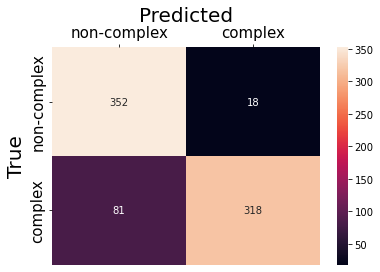

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       370
           1       0.95      0.80      0.87       399

    accuracy                           0.87       769
   macro avg       0.88      0.87      0.87       769
weighted avg       0.88      0.87      0.87       769

Test Accuracy: 87.13%
Validation Accuracy: 85.01%
SVM MSE: 0.12873862158647595
SVM RMSE: 0.35880164657715263


In [117]:
#SVM model
SVM = svm.SVC(C=0.9, kernel='linear', degree=1)
SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(y_test,y_pred))
result = SVM.score(X_test, y_test)
print("Test Accuracy: %.2f%%" % (result*100.0))

# k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = svm.SVC(C=0.9, kernel='linear', degree=1)
results_kfold = model_selection.cross_val_score(model_kfold, X_train,y_train, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('SVM MSE: '+str(mse))
print('SVM RMSE: '+str(rmse))

In [107]:
for i,j,k in zip(y_test,y_pred,x_test):
    print(str(i)+" "+str(j)+" "+k)

0 1 እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ 
1 1 በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ 
0 0 ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ 
1 0 በሽር አደነ መንግስት ገር ሸማቂወችን ደመሰሰ ተቻለ 
0 0 ሃብታም ስም ጠቀሰ ከእነእንትና አመሸ መዘነ 
1 1 አፄ ምኒልክ መሃንድሱን አዝዘው እንጦጦ ደጋ መሃንድሱ ኖራ ገነባ ውሃ ቦይ መጣ 
1 1 ቡድን አመራር ጠቀለለ ሚኒስትር ሃይለ አራ ደሳለኝ ራስ አሻራ ኖረ 
0 0 ኢትዮጵያ አትሌቲክስ ፌደሬሽን ስህተት ፈጸመ ዳኛ እርምጃ ወሰደ አወቀ 
0 0 ፋይናንስ ተቋም አይነት ተቋም ኖረ ተቋቋመ ቻለ ዳያስፖራ 
0 0 ሞላ ነገደ ድርግ ህይወት ተከለ ቻለ ይኖራሉን 
0 0 ሆቴል ግንባታ ፈቀደ ነገደ ማስተር ፕላን እንደት ተገናዘበ ተቻለ 
0 0 መሬት ታየ ራስ ተነጠለ ከፋ መረረ ጥናት ጠቈመ 
1 1 አንደኛ ሁለተኛ ወለል ሬስቶራንት የቤተ መፃህፍት አገልግሎት ሰጠ 
0 0 ገጠመ ታሪክ አይነት የብዙወች እናት ገጠመ አሰበ 
0 0 የኮፓ አሜሪካ ዋንጫ ውድድር ተነሳ ዘወትር ተነሳ ብራዚል አርጀንቲና ባላንጣነት 
1 1 መሰለ አዛውንት በስተግራ ሰየመ ጥርሰ ፍንጭት ሰጠ 
0 0 ዋና ስትራቴጅ አልሸባብ መታ ረጋ መንግስት ሶማሊያ ኖረ አገዘ 
0 1 ከየፎኒ ልጅ ካሌብ ከነዌ ልጅ ኢያሱ በስተቀር ተረፈ ሰው 
1 1 ይሁን አገር ጨመረ ብዙወቹን አፍሪካ ሃገር ሳበ አስጨናቂ ተግዳሮት 
1 1 ደግነት ኢቴቪ ቀን ደርግ አወገዘ ዋለ እኔ ገላገለ ስፖንሰር ኬኩን ሰራ 
1 1 ቀና አገልግሎት መስክ ቀጠለ ያህዌ ትምክህት አደረ ኖረ 
1 0 ዶሮ ቆዳ መገበ ፈለገ ደንበኛ ዶሮ ከነነፍሱ ቤት ወሰደ ራስ መበለት ጠበቀ 
0 0 ከነአን አብርሃ ይስሃቅ ያእቆብ ኖረ እውስ 
0 0 ማህበር ኖረ ምክንያት

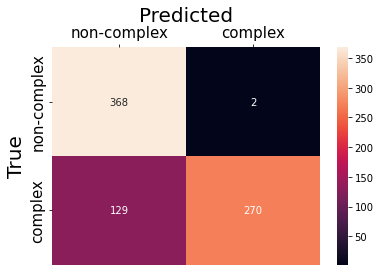

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       370
           1       0.99      0.68      0.80       399

    accuracy                           0.83       769
   macro avg       0.87      0.84      0.83       769
weighted avg       0.87      0.83      0.83       769

Test Accuracy: 82.96%
Validation Accuracy: 82.44%
RF MSE: 0.17035110533159947
RF RMSE: 0.41273612070135013


In [118]:
#Random forest
RF = RandomForestClassifier(random_state=3, n_estimators=10)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(y_test,y_pred))
result =RF.score(X_test, y_test)
print("Test Accuracy: %.2f%%" % (result*100.0))

#k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier(random_state=3, n_estimators=10)
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('RF MSE: '+str(mse))
print('RF RMSE: '+str(rmse))

In [109]:
for i,j,k in zip(y_test,y_pred,x_test):
    print(str(i)+" "+str(j)+" "+k)

0 0 እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ 
1 1 በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ 
0 0 ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ 
1 0 በሽር አደነ መንግስት ገር ሸማቂወችን ደመሰሰ ተቻለ 
0 0 ሃብታም ስም ጠቀሰ ከእነእንትና አመሸ መዘነ 
1 1 አፄ ምኒልክ መሃንድሱን አዝዘው እንጦጦ ደጋ መሃንድሱ ኖራ ገነባ ውሃ ቦይ መጣ 
1 0 ቡድን አመራር ጠቀለለ ሚኒስትር ሃይለ አራ ደሳለኝ ራስ አሻራ ኖረ 
0 0 ኢትዮጵያ አትሌቲክስ ፌደሬሽን ስህተት ፈጸመ ዳኛ እርምጃ ወሰደ አወቀ 
0 0 ፋይናንስ ተቋም አይነት ተቋም ኖረ ተቋቋመ ቻለ ዳያስፖራ 
0 0 ሞላ ነገደ ድርግ ህይወት ተከለ ቻለ ይኖራሉን 
0 0 ሆቴል ግንባታ ፈቀደ ነገደ ማስተር ፕላን እንደት ተገናዘበ ተቻለ 
0 0 መሬት ታየ ራስ ተነጠለ ከፋ መረረ ጥናት ጠቈመ 
1 1 አንደኛ ሁለተኛ ወለል ሬስቶራንት የቤተ መፃህፍት አገልግሎት ሰጠ 
0 0 ገጠመ ታሪክ አይነት የብዙወች እናት ገጠመ አሰበ 
0 0 የኮፓ አሜሪካ ዋንጫ ውድድር ተነሳ ዘወትር ተነሳ ብራዚል አርጀንቲና ባላንጣነት 
1 1 መሰለ አዛውንት በስተግራ ሰየመ ጥርሰ ፍንጭት ሰጠ 
0 0 ዋና ስትራቴጅ አልሸባብ መታ ረጋ መንግስት ሶማሊያ ኖረ አገዘ 
0 0 ከየፎኒ ልጅ ካሌብ ከነዌ ልጅ ኢያሱ በስተቀር ተረፈ ሰው 
1 1 ይሁን አገር ጨመረ ብዙወቹን አፍሪካ ሃገር ሳበ አስጨናቂ ተግዳሮት 
1 1 ደግነት ኢቴቪ ቀን ደርግ አወገዘ ዋለ እኔ ገላገለ ስፖንሰር ኬኩን ሰራ 
1 1 ቀና አገልግሎት መስክ ቀጠለ ያህዌ ትምክህት አደረ ኖረ 
1 0 ዶሮ ቆዳ መገበ ፈለገ ደንበኛ ዶሮ ከነነፍሱ ቤት ወሰደ ራስ መበለት ጠበቀ 
0 0 ከነአን አብርሃ ይስሃቅ ያእቆብ ኖረ እውስ 
0 0 ማህበር ኖረ ምክንያት

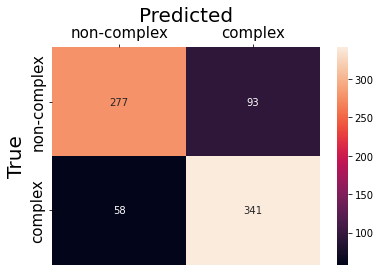

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       370
           1       0.79      0.85      0.82       399

    accuracy                           0.80       769
   macro avg       0.81      0.80      0.80       769
weighted avg       0.81      0.80      0.80       769

Test Accuracy: 80.36%
Validation Accuracy: 78.15%
NB MSE: 0.19635890767230169
NB RMSE: 0.44312403192819694


In [119]:
# NB models
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train, y_train)

y_pred = Naive.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(y_test,y_pred))
result = Naive.score(X_test, y_test)
print("Test Accuracy: %.2f%%" % (result*100.0))

#k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = naive_bayes.MultinomialNB()
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('NB MSE: '+str(mse))
print('NB RMSE: '+str(rmse))

In [111]:
for i,j,k in zip(y_test,y_pred,x_test):
    print(str(i)+" "+str(j)+" "+k)

0 1 እብድ መራ ገለጸ የድብርት ተጠቃ መራ በለጠ አስፈሪ 
1 1 በላይ ለውጥ አረመ ፈለገ ጨበጠ ግብአት ሳጥን ዘገበ 
0 0 ይሄንን ተቋቋመ ያዘ ምክንያታዊ ትክክለኛ ነገደ ያህል ጉልበት እንዳለ 
1 0 በሽር አደነ መንግስት ገር ሸማቂወችን ደመሰሰ ተቻለ 
0 0 ሃብታም ስም ጠቀሰ ከእነእንትና አመሸ መዘነ 
1 1 አፄ ምኒልክ መሃንድሱን አዝዘው እንጦጦ ደጋ መሃንድሱ ኖራ ገነባ ውሃ ቦይ መጣ 
1 1 ቡድን አመራር ጠቀለለ ሚኒስትር ሃይለ አራ ደሳለኝ ራስ አሻራ ኖረ 
0 0 ኢትዮጵያ አትሌቲክስ ፌደሬሽን ስህተት ፈጸመ ዳኛ እርምጃ ወሰደ አወቀ 
0 1 ፋይናንስ ተቋም አይነት ተቋም ኖረ ተቋቋመ ቻለ ዳያስፖራ 
0 0 ሞላ ነገደ ድርግ ህይወት ተከለ ቻለ ይኖራሉን 
0 0 ሆቴል ግንባታ ፈቀደ ነገደ ማስተር ፕላን እንደት ተገናዘበ ተቻለ 
0 1 መሬት ታየ ራስ ተነጠለ ከፋ መረረ ጥናት ጠቈመ 
1 1 አንደኛ ሁለተኛ ወለል ሬስቶራንት የቤተ መፃህፍት አገልግሎት ሰጠ 
0 0 ገጠመ ታሪክ አይነት የብዙወች እናት ገጠመ አሰበ 
0 0 የኮፓ አሜሪካ ዋንጫ ውድድር ተነሳ ዘወትር ተነሳ ብራዚል አርጀንቲና ባላንጣነት 
1 1 መሰለ አዛውንት በስተግራ ሰየመ ጥርሰ ፍንጭት ሰጠ 
0 1 ዋና ስትራቴጅ አልሸባብ መታ ረጋ መንግስት ሶማሊያ ኖረ አገዘ 
0 1 ከየፎኒ ልጅ ካሌብ ከነዌ ልጅ ኢያሱ በስተቀር ተረፈ ሰው 
1 1 ይሁን አገር ጨመረ ብዙወቹን አፍሪካ ሃገር ሳበ አስጨናቂ ተግዳሮት 
1 1 ደግነት ኢቴቪ ቀን ደርግ አወገዘ ዋለ እኔ ገላገለ ስፖንሰር ኬኩን ሰራ 
1 1 ቀና አገልግሎት መስክ ቀጠለ ያህዌ ትምክህት አደረ ኖረ 
1 1 ዶሮ ቆዳ መገበ ፈለገ ደንበኛ ዶሮ ከነነፍሱ ቤት ወሰደ ራስ መበለት ጠበቀ 
0 0 ከነአን አብርሃ ይስሃቅ ያእቆብ ኖረ እውስ 
0 0 ማህበር ኖረ ምክንያት

prediction

In [90]:
sc='ኛው ኦሮሚያ ታዳጊወች ስፖርት ውድድር ዛር ጀመረ አዳማ ከተማ አስተናጋጅነት ተካሄደ'
org_sent={'pre':[sc]}
df=pd.DataFrame(org_sent)

sc=vectorizer.transform(df['pre'])
result_svm = SVM.predict(sc)
result_rf = RF.predict(sc)
print(result_svm)
print(result_rf)

[0]
[0]


In [91]:
#TFIDF feature extruction************************8

In [112]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)
# feature extruction
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
Tfidf_vect.fit(trainData['text'])
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

X1 = Tfidf_vect.transform(x_train)
Y1=Encoder.fit_transform(y_train)

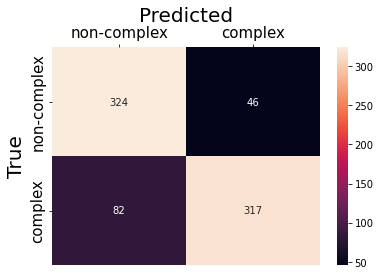

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       370
           1       0.87      0.79      0.83       399

    accuracy                           0.83       769
   macro avg       0.84      0.84      0.83       769
weighted avg       0.84      0.83      0.83       769

Test Accuracy: 83.36%
Validation Accuracy: 81.02%
SVM MSE: 0.16644993498049415
SVM RMSE: 0.40798276309238135


In [113]:
#SVM model
SVM = svm.SVC(C=0.9, kernel='linear', degree=1)
SVM.fit(Train_X_Tfidf,Train_Y)

y_pred = SVM.predict(Test_X_Tfidf)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(Test_Y,y_pred))
result = SVM.score(Test_X_Tfidf, Test_Y)
print("Test Accuracy: %.2f%%" % (result*100.0))

#k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = svm.SVC(C=0.9, kernel='linear', degree=1)
results_kfold = model_selection.cross_val_score(model_kfold, X1, Y1, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('SVM MSE: '+str(mse))
print('SVM RMSE: '+str(rmse))

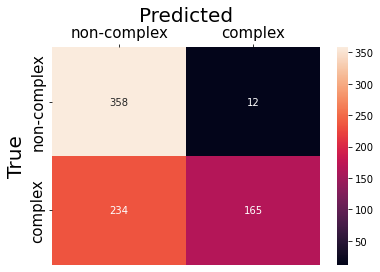

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       370
           1       0.93      0.41      0.57       399

    accuracy                           0.68       769
   macro avg       0.77      0.69      0.66       769
weighted avg       0.77      0.68      0.66       769

Test Accuracy: 68.01%
Validation Accuracy: 78.43%
RF MSE: 0.3198959687906372
RF RMSE: 0.56559346600773


In [114]:
RF = RandomForestClassifier(random_state=3, n_estimators=10)
RF.fit(Train_X_Tfidf,Train_Y)

y_pred = RF.predict(Test_X_Tfidf)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(Test_Y,y_pred))
result = RF.score(Test_X_Tfidf, Test_Y)
print("Test Accuracy: %.2f%%" % (result*100.0))

#k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier(random_state=3, n_estimators=10)
results_kfold = model_selection.cross_val_score(model_kfold, X1, Y1, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('RF MSE: '+str(mse))
print('RF RMSE: '+str(rmse))

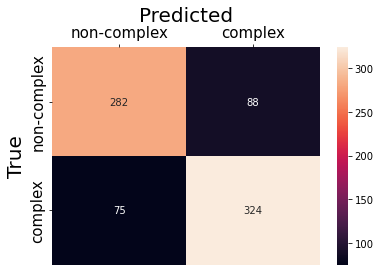

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       370
           1       0.79      0.81      0.80       399

    accuracy                           0.79       769
   macro avg       0.79      0.79      0.79       769
weighted avg       0.79      0.79      0.79       769

Test Accuracy: 78.80%
Validation Accuracy: 76.68%
NB MSE: 0.21196358907672302
NB RMSE: 0.46039503589496167


In [115]:
# NB models
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

y_pred = Naive.predict(Test_X_Tfidf)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
ax.xaxis.tick_top()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['non-complex', 'complex'], fontsize = 15)
plt.show()

print(classification_report(Test_Y,y_pred))
result = Naive.score(Test_X_Tfidf, Test_Y)
print("Test Accuracy: %.2f%%" % (result*100.0))

#k-fold cros validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = naive_bayes.MultinomialNB()
results_kfold = model_selection.cross_val_score(model_kfold, X1, Y1, cv=kfold)
print("Validation Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('NB MSE: '+str(mse))
print('NB RMSE: '+str(rmse))

Graph generation 

In [96]:
trainData2 = pd.read_csv("dataset/all data/train_data.csv",encoding="utf-8")
vectorizer = CountVectorizer(ngram_range=(1,2))
Encoder = LabelEncoder()

vectorizer.fit(trainData2['text'].values)
X_train = vectorizer.transform(trainData2['text'].values)
y_train = Encoder.fit_transform(trainData2['label'].values)

In [97]:
train_sizes_svm, train_scores_svm, validation_scores_svm = learning_curve(SVM, X_train, y_train,\
                                                        cv=10, scoring='accuracy', n_jobs=-1,\
                                                        train_sizes=np.linspace(0.4, 1.0, 40))

In [98]:
train_sizes_rf, train_scores_rf, validation_scores_rf = learning_curve(RF, X_train, y_train,\
                                                        cv=10, scoring='accuracy', n_jobs=-1,\
                                                        train_sizes=np.linspace(0.4, 1.0, 40))

In [99]:
train_sizes_nb, train_scores_nb, validation_scores_nb = learning_curve(Naive, X_train, y_train,\
                                                        cv=10, scoring='accuracy', n_jobs=-1,\
                                                        train_sizes=np.linspace(0.4, 1.0, 40))

In [100]:
train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)
validation_mean_svm = np.mean(validation_scores_svm, axis=1)
validation_std_svm = np.std(validation_scores_svm, axis=1)

train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
validation_mean_rf = np.mean(validation_scores_rf, axis=1)
validation_std_rf = np.std(validation_scores_rf, axis=1)

train_mean_nb = np.mean(train_scores_nb, axis=1)
train_std_nb = np.std(train_scores_nb, axis=1)
validation_mean_nb = np.mean(validation_scores_nb, axis=1)
validation_std_nb = np.std(validation_scores_nb, axis=1)

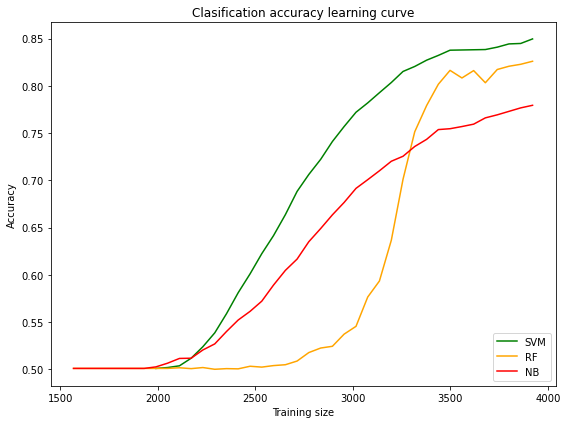

In [101]:
plt.subplots(1, figsize=(8,6))
plt.plot(train_sizes_svm, validation_mean_svm, color="green", label="SVM")
plt.plot(train_sizes_rf, validation_mean_rf, color="orange", label="RF")
plt.plot(train_sizes_nb, validation_mean_nb, color="red", label="NB")

plt.title("Clasification accuracy learning curve")
plt.xlabel("Training size"), plt.ylabel("Accuracy"), plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [102]:
train_mean_svm = np.mean(1-train_scores_svm, axis=1)
train_std_svm = np.std(1-train_scores_svm, axis=1)
validation_mean_svm = np.mean(1-validation_scores_svm, axis=1)
validation_std_svm = np.std(1-validation_scores_svm, axis=1)

train_mean_rf = np.mean(1-train_scores_rf, axis=1)
train_std_rf = np.std(1-train_scores_rf, axis=1)
validation_mean_rf = np.mean(1-validation_scores_rf, axis=1)
validation_std_rf = np.std(1-validation_scores_rf, axis=1)

train_mean_nb = np.mean(1-train_scores_rf, axis=1)
train_std_nb = np.std(1-train_scores_rf, axis=1)
validation_mean_nb = np.mean(1-validation_scores_nb, axis=1)
validation_std_nb = np.std(1-validation_scores_nb, axis=1)

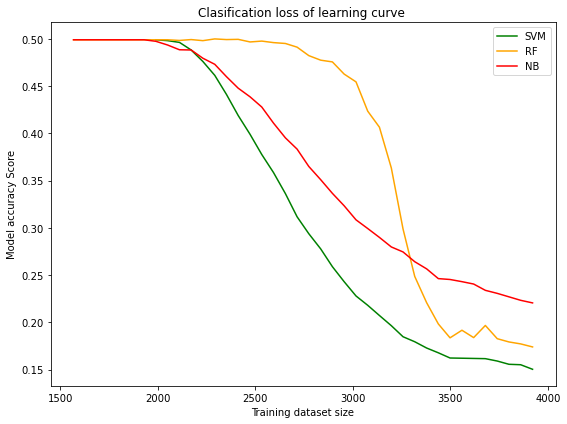

In [103]:
plt.subplots(1, figsize=(8,6))
plt.plot(train_sizes_svm, validation_mean_svm, color="green", label="SVM")
plt.plot(train_sizes_rf, validation_mean_rf, color="orange", label="RF")
plt.plot(train_sizes_nb, validation_mean_nb, color="red", label="NB")

plt.title("Clasification loss of learning curve ")
plt.xlabel("Training dataset size"), plt.ylabel("Model accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()